# EDA 1

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import timedelta
import seaborn as sns
import plotly.express as px
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

In [2]:
# read
tags=pd.read_excel("../../data/meta data/tags relevantes.xlsx")
tags_cc=tags.tag.to_list()
dic={}
for i,j in zip(tags.tag,tags.description):
    dic[i]=j
tags

,tag,description,upper bound,lower bound,unit
0,CF:CVB007_S2.PNT.FOX,granulometry,NaN,NaN,NaN
1,CF:225.WIC8067.MEAS.FOX,charge cell,NaN,NaN,NaN
2,disp_ley_pirita,pyrite law,NaN,NaN,NaN
3,disp_ley_calcopirita,chalcopyrite law,NaN,NaN,NaN
4,disp_ley_calcosina,chalcocite law,NaN,NaN,NaN
5,disp_crusher_index,crusher index,NaN,NaN,NaN
6,disp_sag_power_index,sag power index,NaN,NaN,NaN
7,disp_ball_work_index,ball work index,NaN,NaN,NaN
8,CF:215.WIC1605A.MEAS.FOX,TPH,NaN,NaN,NaN
9,CF:EXPERTO:EXP_MS_A.MEAS_5.FOX,HH TPH,NaN,NaN,NaN


In [3]:
# Se lee csv
cleaned=pd.read_csv('../../data/consolidated data/cleaned_15December2022.csv', parse_dates=['Timestamp'], index_col='Timestamp')
cleaned.sort_index(inplace=True)
cleaned.rename(columns=dic,inplace=True)
cleaned.head()

,sag mill expert system,Limitado por Límite Alto de Tonelaje,Optimizando tonelaje,Limitado por Peso,Limitado por Corriente Bobina,Limitado por torque espesador 2,Limitado por torque espesador 3,Limitado por Potencia Bolas 1,Limitado por Potencia Bolas 2,Limitado por Pebbles,Limitado por Corriente harnero,Limitado por Potencia SAG,Limitado por limite bajo de tonelaje,Limitado por Temperatura bobina,Limitado por presión espesador 2,Limitado por presión espesador 3,pyrite law,chalcopyrite law,chalcocite law,covelin law,crusher index,sag power index,ball work index,bornite law,torque,charge cell,power,TPH,solid percentage,water,speed,solid,LL charge cell,HH charge cell,HH TPH,stator current,granulometry
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.499208,864.295848,23071.203516,3847.009774,65.090716,2063.724810,9.063008,65.0,820.0,900.0,4350.0,3935.520368,NaN
2018-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.410009,862.125504,23043.030173,3872.996001,65.171210,2072.257994,9.062102,65.0,820.0,900.0,4350.0,3930.839200,NaN
2018-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.261466,859.956386,22991.287211,3879.211149,65.122192,2079.820066,9.062520,65.0,820.0,900.0,4350.0,3923.503230,NaN
2018-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.115891,858.914758,22943.243462,3894.792946,65.085609,2089.536865,9.062208,65.0,820.0,900.0,4350.0,3914.689267,62.811786
2018-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.054172,857.932221,22921.665087,3959.416847,65.271563,2110.715057,9.062822,65.0,820.0,900.0,4350.0,3910.292390,62.749109


### Matriz de nulls

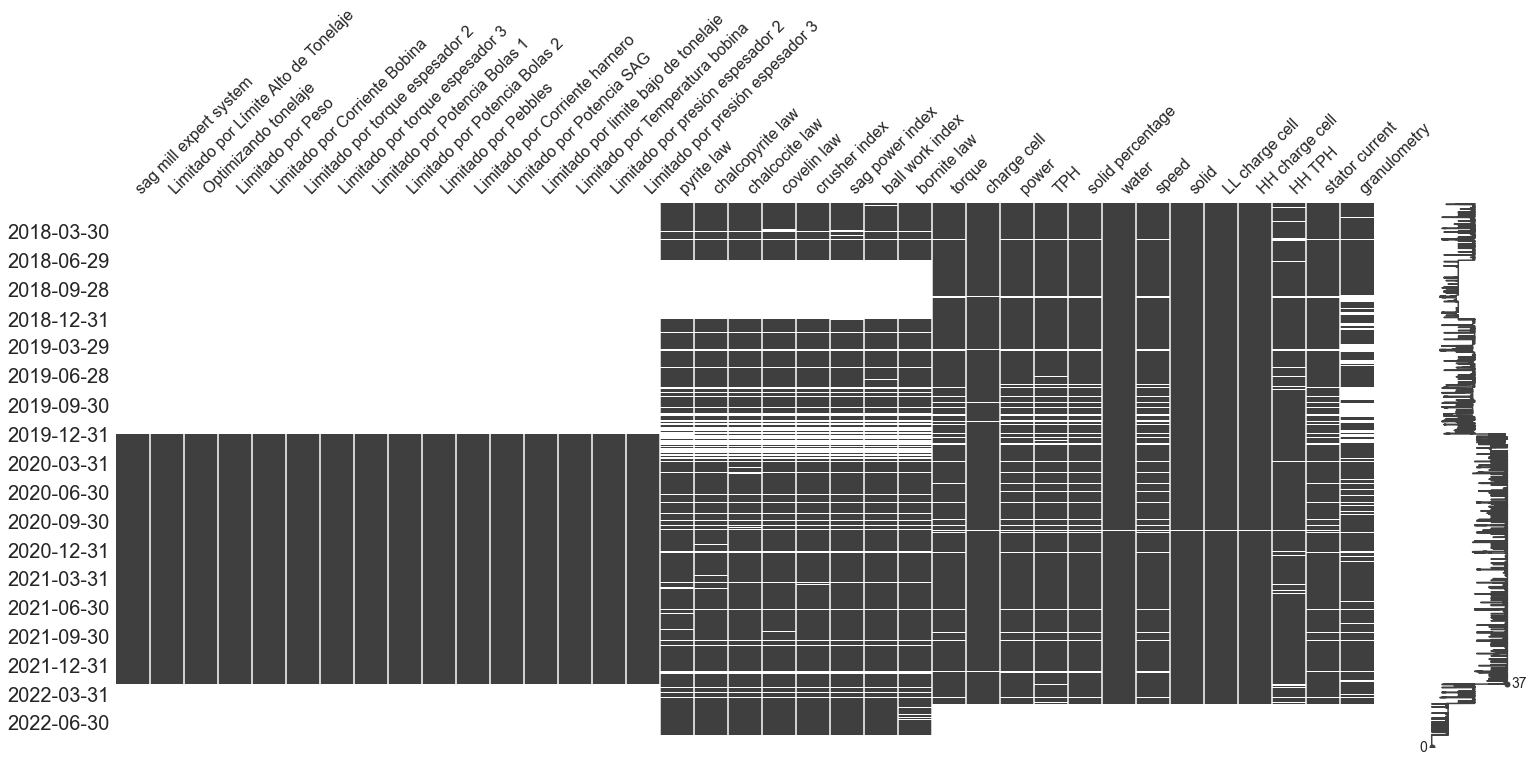

In [4]:
# Missings
msno.matrix(cleaned,freq='BQ')
plt.show()

### % de nulls por tag

In [5]:
df_nan=pd.DataFrame()
df_nan["% nans total"]=(cleaned.isnull().sum()/len(cleaned)*100).apply(lambda x: round(x,1))
df_nan

,% nans total
sag mill expert system,54.0
Limitado por Límite Alto de Tonelaje,54.0
Optimizando tonelaje,54.0
Limitado por Peso,54.0
Limitado por Corriente Bobina,54.0
Limitado por torque espesador 2,54.0
Limitado por torque espesador 3,54.0
Limitado por Potencia Bolas 1,54.0
Limitado por Potencia Bolas 2,54.0
Limitado por Pebbles,54.0


### Describe

In [6]:
cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
sag mill expert system,1139040.0,0.861237,0.345700,0.000000,1.000000,1.000000,1.000000,1.000000
Limitado por Límite Alto de Tonelaje,1139040.0,0.754427,0.430427,0.000000,1.000000,1.000000,1.000000,1.000000
Optimizando tonelaje,1139040.0,0.162006,0.368456,0.000000,0.000000,0.000000,0.000000,1.000000
Limitado por Peso,1139040.0,0.144900,0.352000,0.000000,0.000000,0.000000,0.000000,1.000000
Limitado por Corriente Bobina,1139040.0,0.005044,0.070840,0.000000,0.000000,0.000000,0.000000,1.000000
Limitado por torque espesador 2,1139040.0,0.000845,0.029064,0.000000,0.000000,0.000000,0.000000,1.000000
Limitado por torque espesador 3,1139040.0,0.000478,0.021869,0.000000,0.000000,0.000000,0.000000,1.000000
Limitado por Potencia Bolas 1,1139040.0,0.000277,0.016627,0.000000,0.000000,0.000000,0.000000,1.000000
Limitado por Potencia Bolas 2,1139040.0,0.000770,0.027737,0.000000,0.000000,0.000000,0.000000,1.000000
Limitado por Pebbles,1139040.0,0.007774,0.087827,0.000000,0.000000,0.000000,0.000000,1.000000


**Visualización de señales en el tiempo**

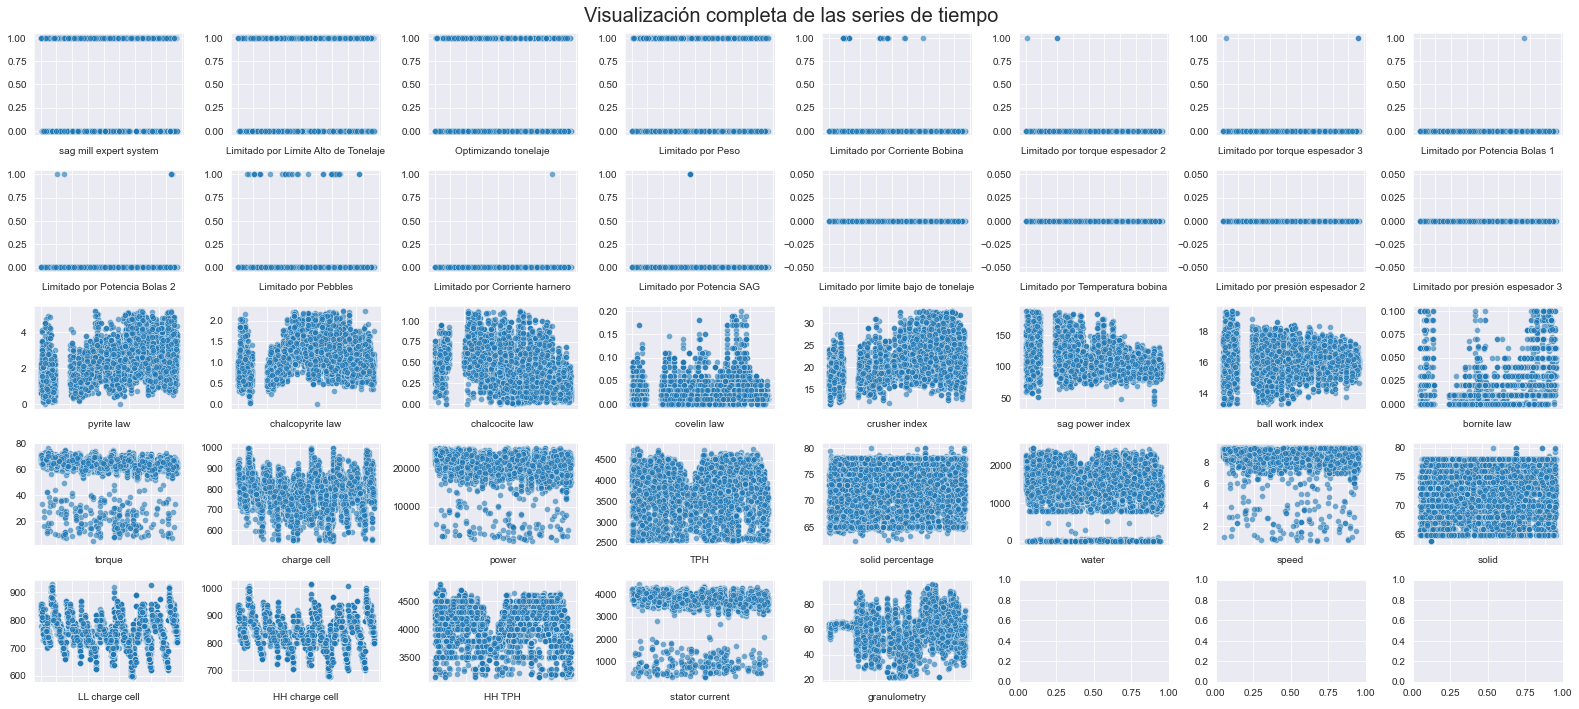

In [7]:
# Visualización completa de las series temporales

sample=cleaned.copy().sample(10000)
fig, ax = plt.subplots(5, 8, figsize=(22,10))
k = 0
for i in range(5):
    for j in range(8):
        try:
            sns.scatterplot(data=sample, x=sample.index, y=sample.columns[k], alpha=0.6, ax=ax[i, j])
            ax[i, j].set_ylabel('', fontsize = 10.0)
            ax[i, j].set_xlabel(sample.columns[k], fontsize = 10.0)
            ax[i, j].set_xticklabels('')
            k+=1
        except:
            pass
fig.suptitle('Visualización completa de las series de tiempo',size=20)
fig.tight_layout()


**Distribución de los datos**

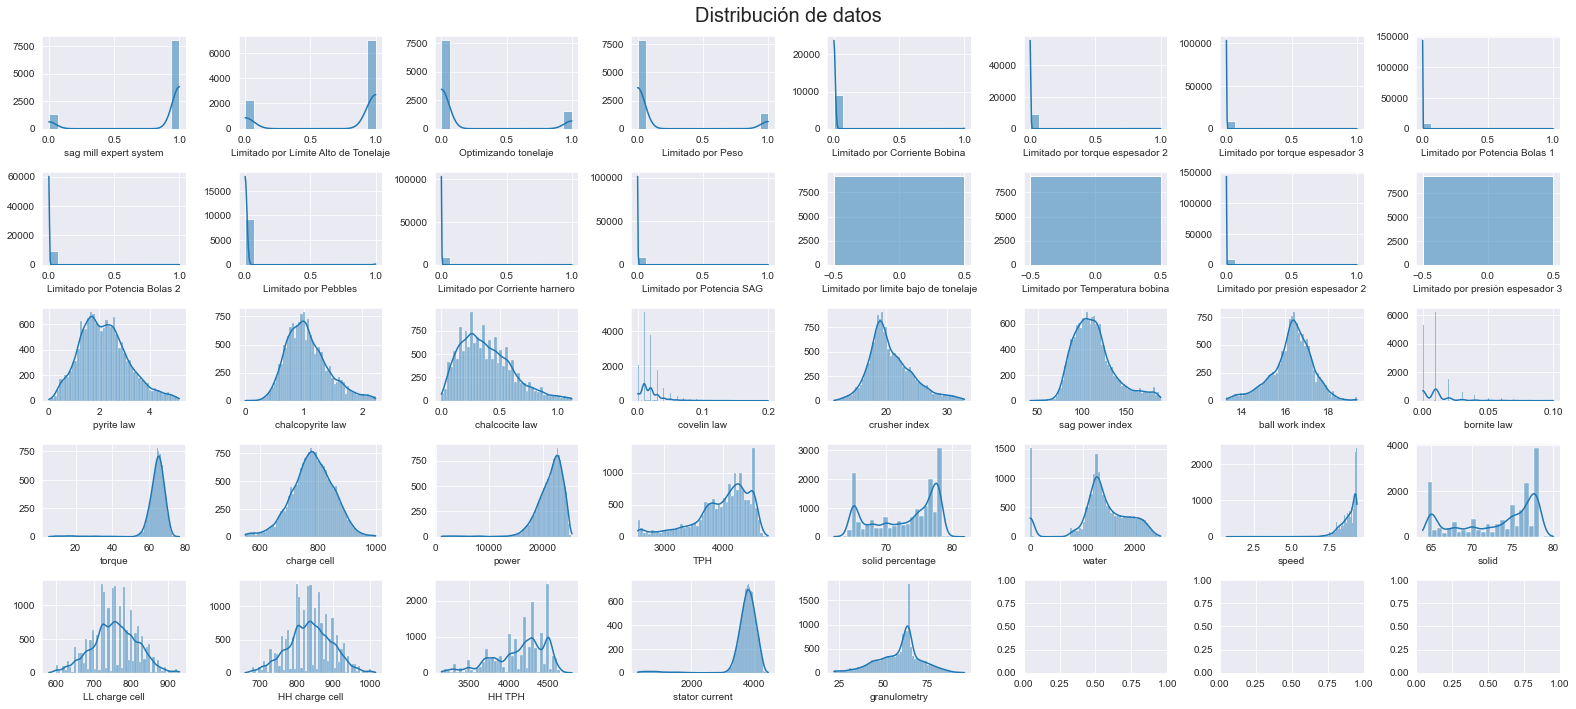

In [8]:
fig, ax = plt.subplots(5, 8, figsize=(22,10))
k = 0
for i in range(5):
    for j in range(8):
        try:
            sns.histplot(data=cleaned.sample(20000), x=cleaned.columns[k], kde=True, ax=ax[i, j])
            ax[i, j].set_ylabel('', fontsize = 10.0)
            ax[i, j].set_xlabel(cleaned.columns[k], fontsize = 10.0)
            #ax[i, j].set_xticklabels('')
            k+=1
        except:
            pass
        
fig.suptitle('Distribución de datos',size=20)
fig.tight_layout()